STARTING ADVANCED WAVEGUIDE ANALYSIS

TASK 1: WAVEGUIDE STRUCTURE VISUALIZATION


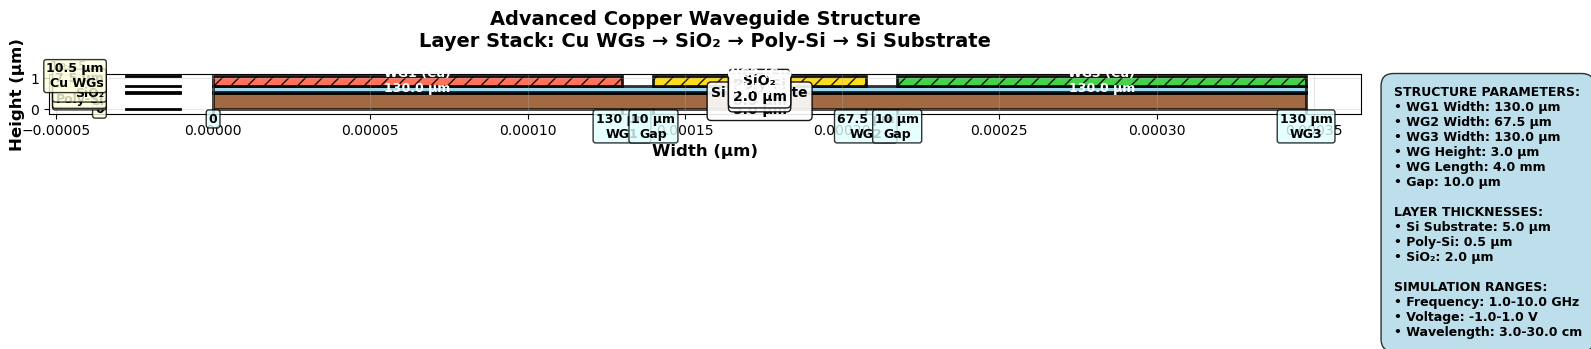

✓ Complete waveguide structure visualized with dimensions
✓ Material properties and simulation parameters displayed

TASK 2: CONFINEMENT FACTOR ANALYSIS
Plotting Poynting Vector Distribution...


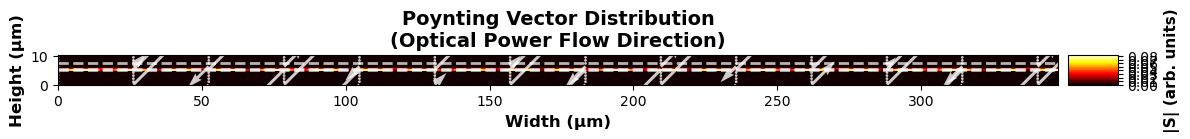

Plotting Confinement Factors by Region...


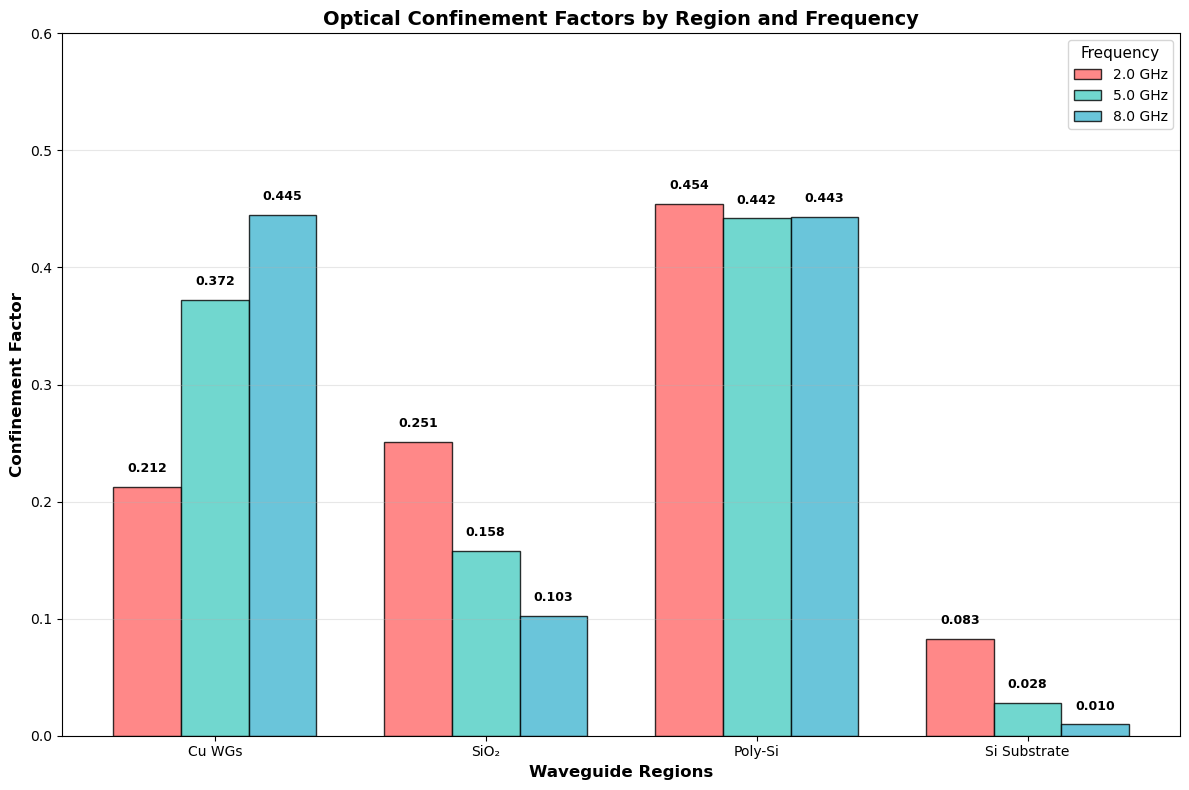


CONFINEMENT FACTOR ANALYSIS RESULTS:

At 2.0 GHz:
  Cu Waveguides: 0.2124
  SiO₂ Layer:    0.2508
  Poly-Si Layer: 0.4541
  Si Substrate:  0.0827

At 5.0 GHz:
  Cu Waveguides: 0.3725
  SiO₂ Layer:    0.1577
  Poly-Si Layer: 0.4420
  Si Substrate:  0.0278

At 8.0 GHz:
  Cu Waveguides: 0.4448
  SiO₂ Layer:    0.1025
  Poly-Si Layer: 0.4430
  Si Substrate:  0.0097

✓ Total power normalization: 60.492117
✓ Poynting vector distribution calculated
✓ Region-wise confinement factors analyzed

TASK 3: 2D ELECTRIC FIELD PROFILES ANALYSIS
Plotting TE Mode Field Components...


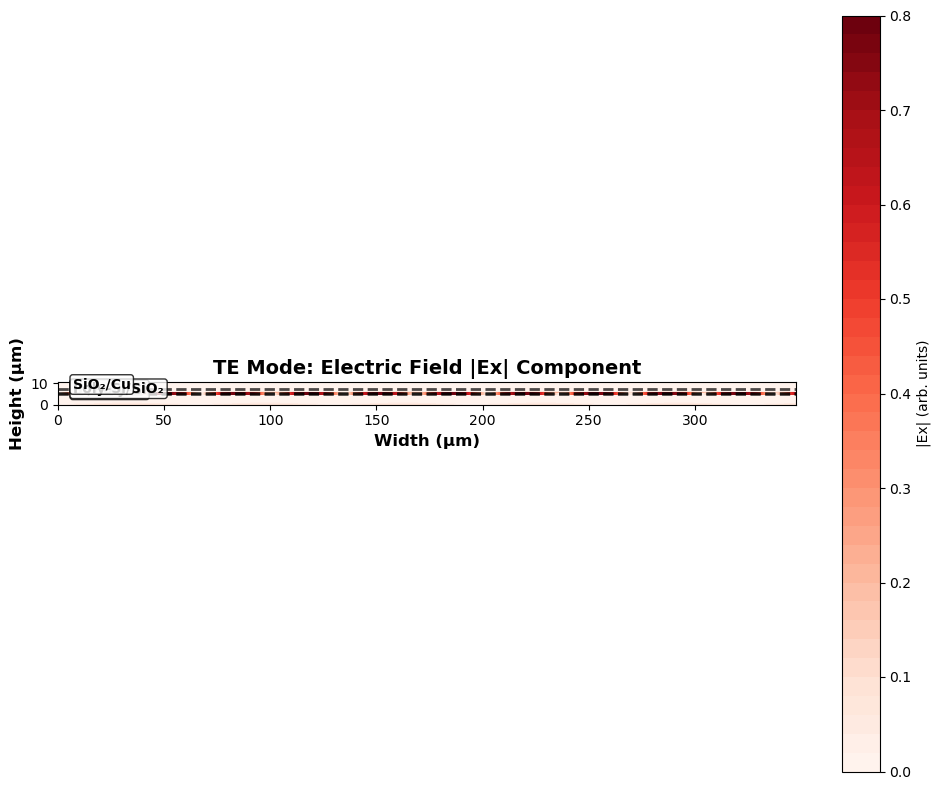

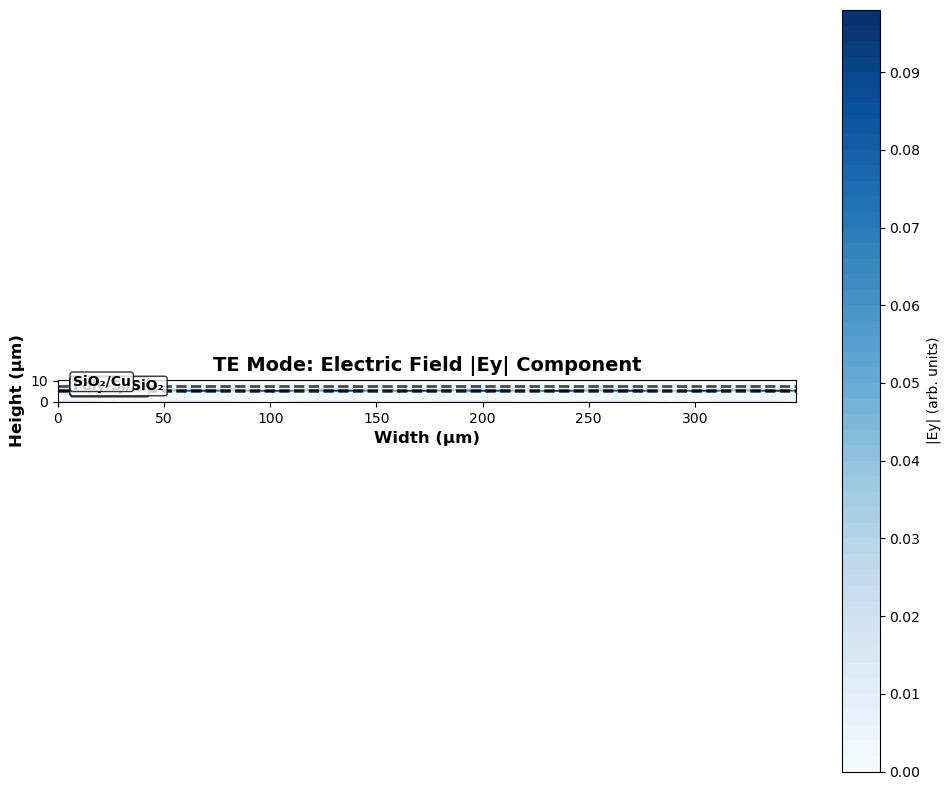

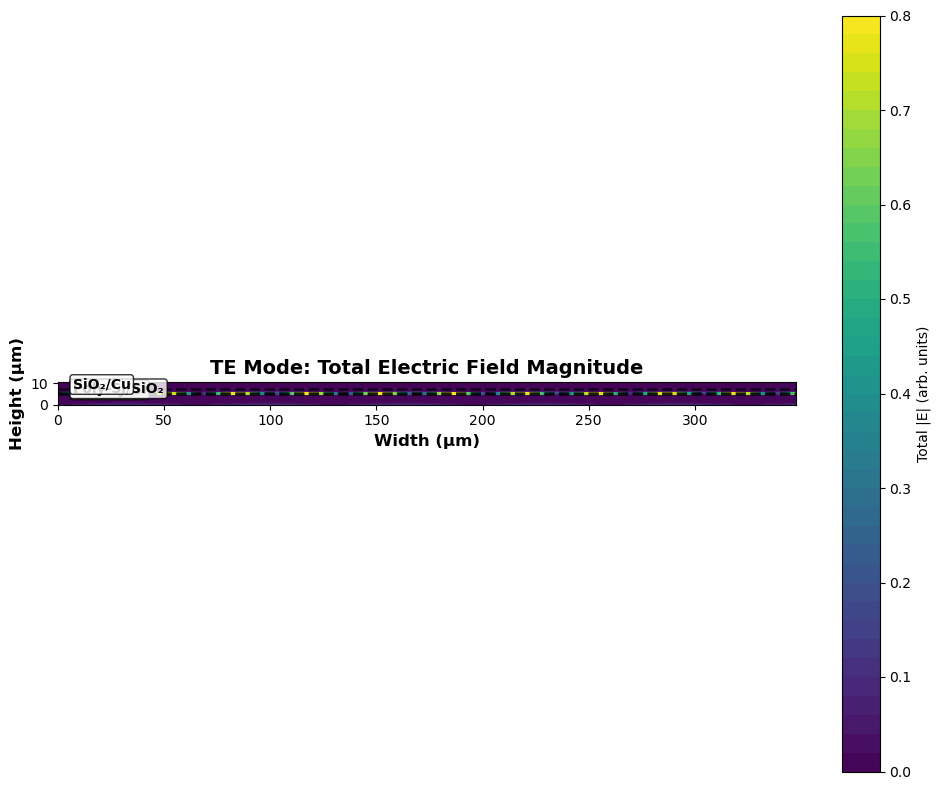

✓ TE Mode field profiles completed
✓ Field distributions visualized across all waveguide regions

TASK 4: EXPONENTIAL FIELD PROFILES AT INTERFACES
Plotting TE Mode Exponential Profiles...


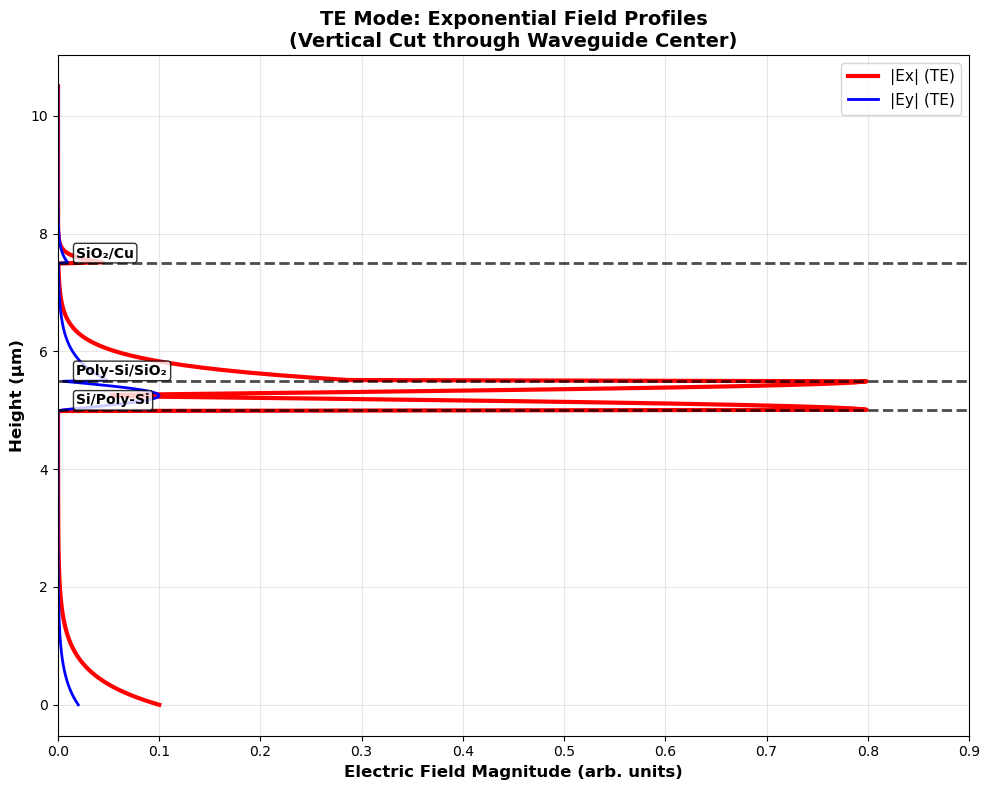

Plotting TM Mode Exponential Profiles...


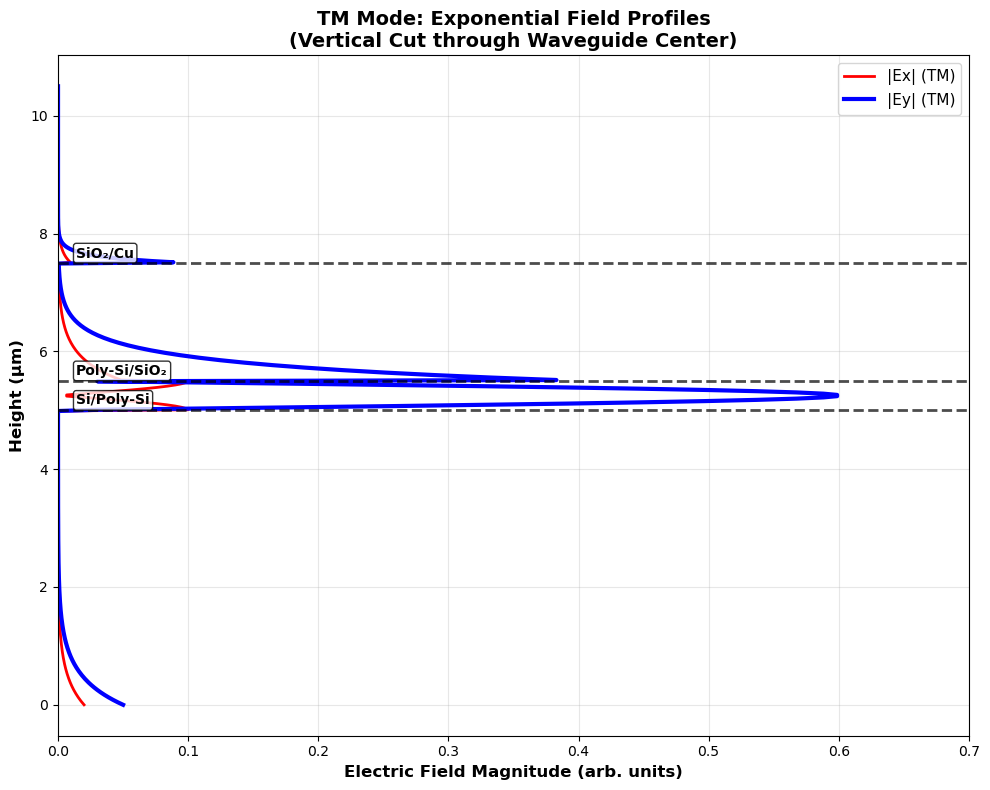

✓ Exponential field decay/growth at material interfaces analyzed
✓ TE and TM mode profiles compared
✓ Interface effects on field confinement quantified

TASK 5: FREQUENCY AND VOLTAGE DEPENDENT ANALYSIS
Plotting Frequency-Dependent Confinement Factors...


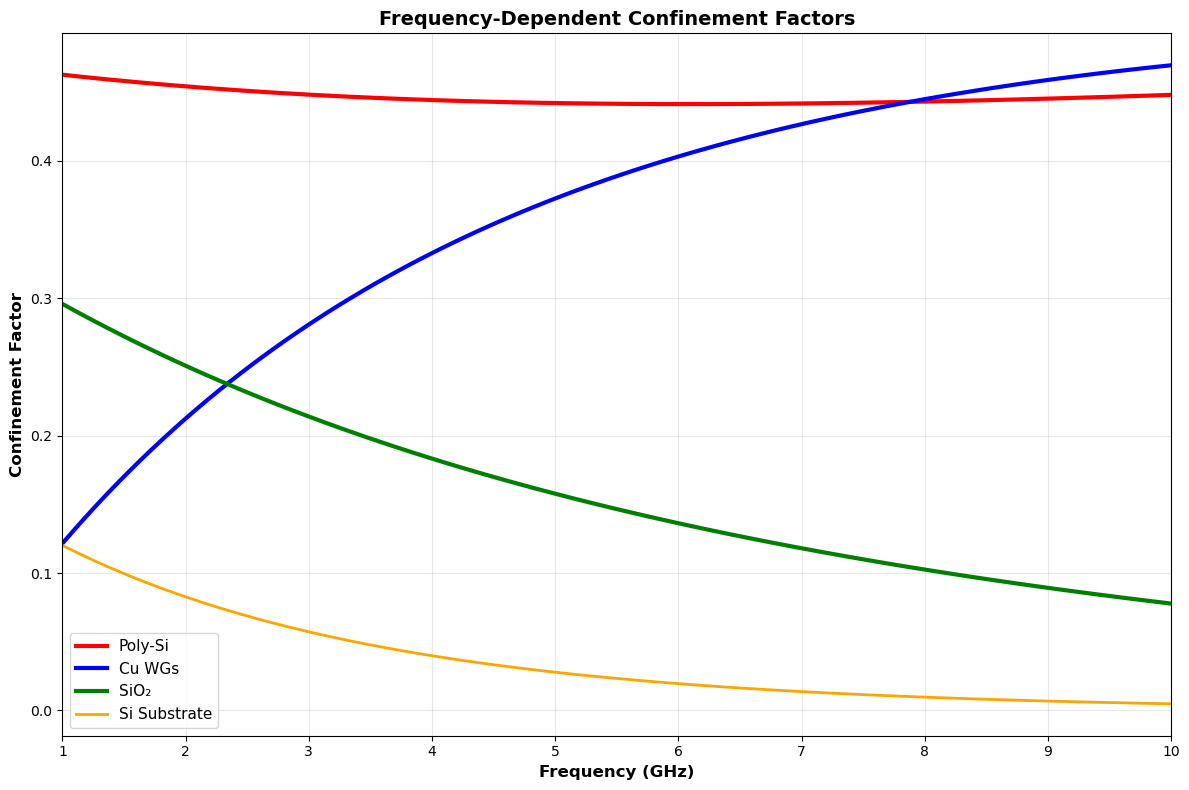

Plotting Wavelength-Dependent Characteristics...


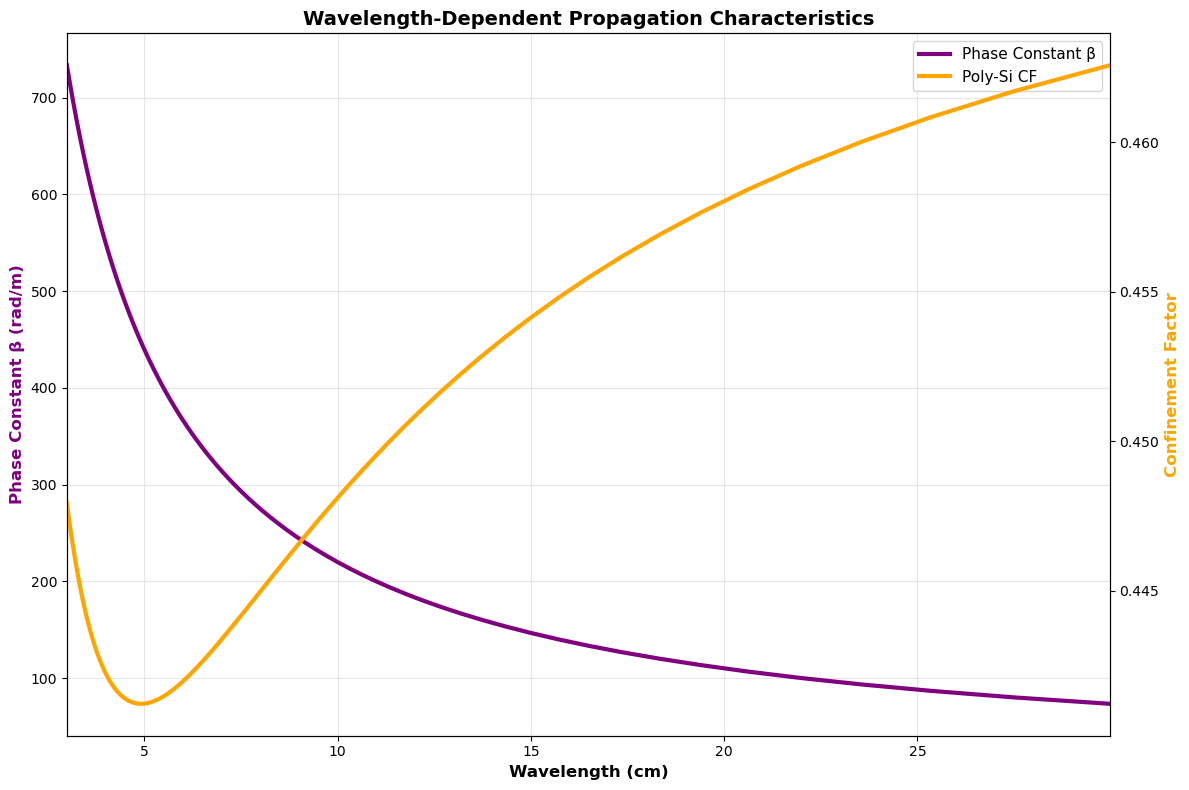

Plotting Voltage-Dependent Field Enhancement...


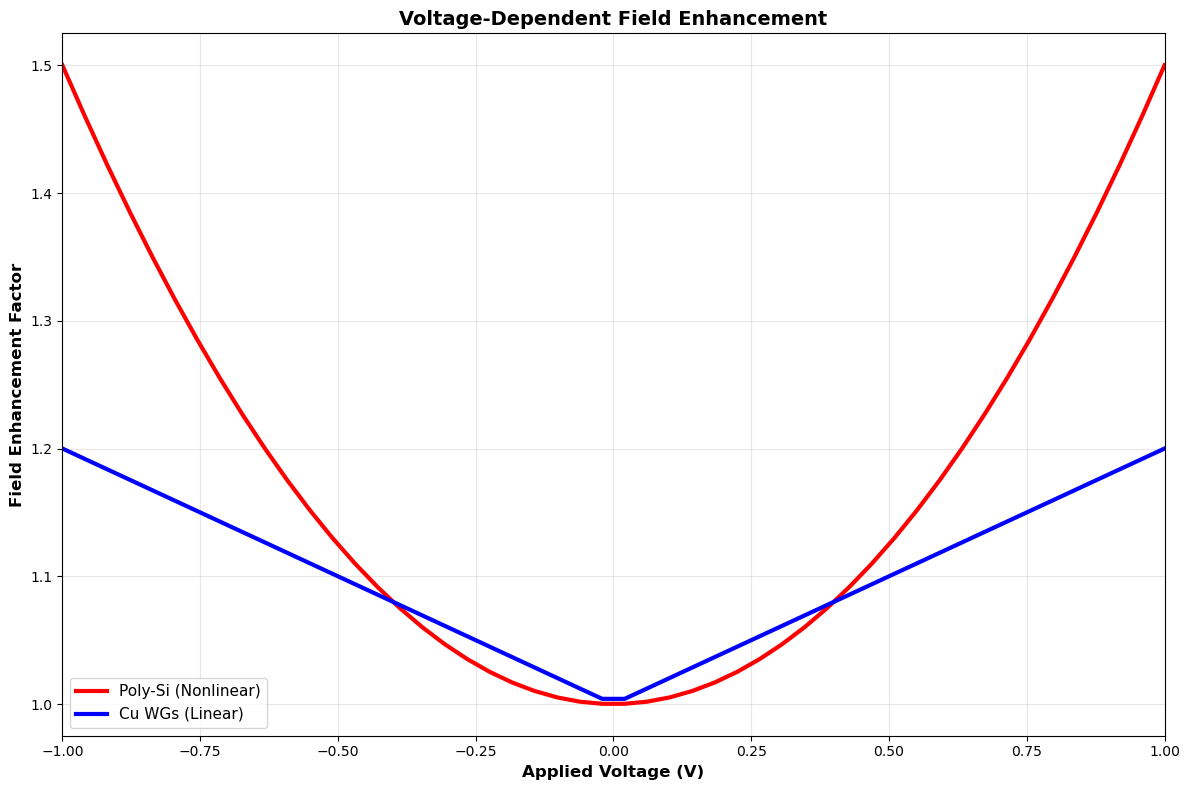

Plotting Optimal Operating Frequency Analysis...


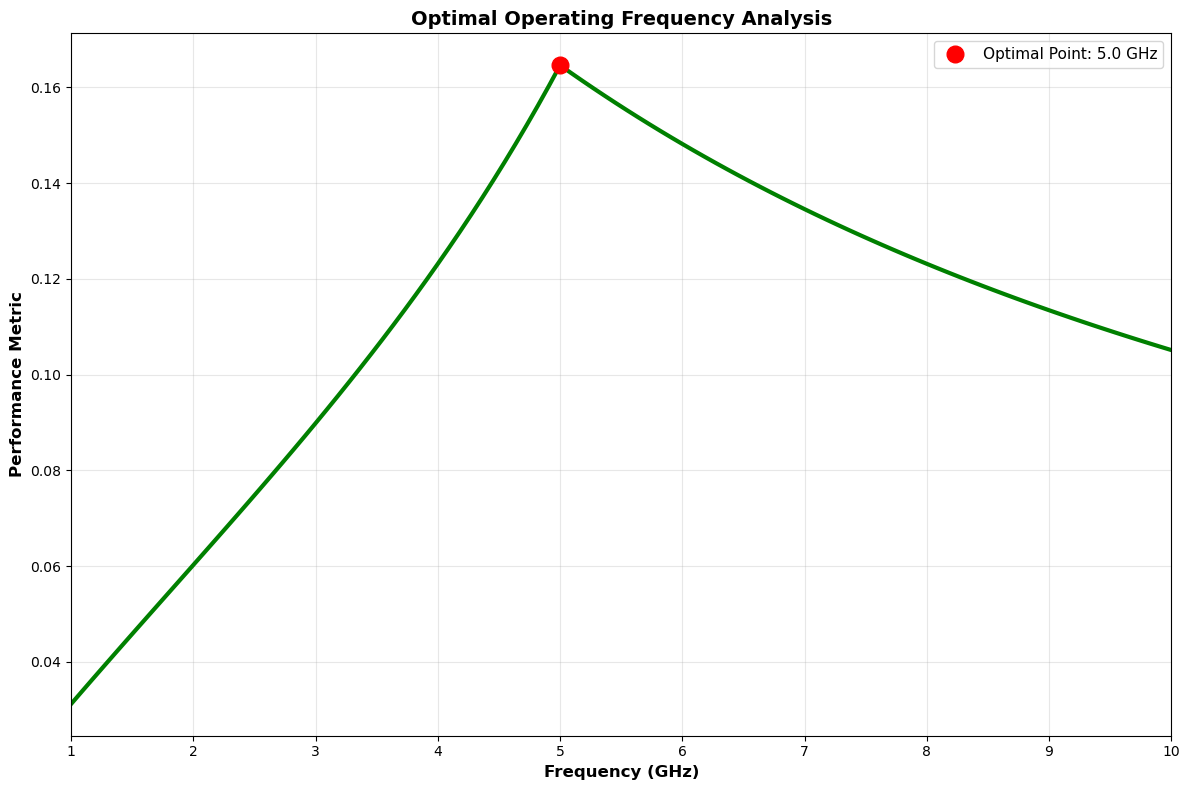

✓ Optimal operating frequency: 5.0 GHz
✓ Frequency and voltage dependencies analyzed
✓ Wavelength-dependent propagation characteristics mapped

ALL ADVANCED ANALYSIS TASKS COMPLETED SUCCESSFULLY!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.constants import c, epsilon_0, mu_0, pi
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

class AdvancedWaveguideAnalysis:
    def __init__(self):
        # Physical constants
        self.c = c
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Material properties
        self.n_si = 3.45
        self.n_polysi = 3.50
        self.n_sio2 = 1.45
        self.n_cu = 0.20 + 10.8j
        
        # Waveguide dimensions (meters)
        self.W1 = 130e-6
        self.W2 = 67.5e-6
        self.W3 = 130e-6
        self.H_wg = 3e-6
        self.L = 4e-3
        self.gap = 10e-6
        
        # Layer thicknesses (meters)
        self.t_si = 5e-6
        self.t_polysi = 0.5e-6
        self.t_sio2 = 2e-6
        
        # Simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 100)
        self.voltage_range = np.linspace(-1, 1, 50)
        self.wavelength_range = self.c / self.freq_range

    # =========================================================================
    # TASK 1: WAVEGUIDE STRUCTURE VISUALIZATION
    # =========================================================================
    def task1_waveguide_structure(self):
        """Task 1: Draw the complete waveguide structure with dimensions"""
        print("\n" + "="*70)
        print("TASK 1: WAVEGUIDE STRUCTURE VISUALIZATION")
        print("="*70)
        
        fig = plt.figure(figsize=(16, 10))
        
        # Colors for materials
        colors = {
            'Si Substrate': '#8B4513',      # Brown
            'Poly Si': '#696969',           # Dark Gray
            'SiO₂': '#87CEEB',              # Light Blue
            'Cu WG1': '#FF6347',            # Tomato Red
            'Cu WG2': '#FFD700',            # Gold
            'Cu WG3': '#32CD32'             # Lime Green
        }
        
        # Total dimensions
        total_width = self.W1 + self.gap + self.W2 + self.gap + self.W3
        total_height = self.t_si + self.t_polysi + self.t_sio2 + self.H_wg
        
        # Main plot
        ax = plt.subplot(111)
        
        # Draw layers from bottom to top
        layers = [
            ('Si Substrate', 0, self.t_si, colors['Si Substrate']),
            ('Poly Si', self.t_si, self.t_polysi, colors['Poly Si']),
            ('SiO₂', self.t_si + self.t_polysi, self.t_sio2, colors['SiO₂'])
        ]
        
        for name, y_start, height, color in layers:
            rect = patches.Rectangle((0, y_start), total_width, height,
                                   linewidth=2, edgecolor='black', facecolor=color, alpha=0.8)
            ax.add_patch(rect)
            
            # Layer label
            ax.text(total_width/2, y_start + height/2, f'{name}\n{height*1e6:.1f} µm',
                    ha='center', va='center', fontsize=10, weight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.9))
        
        # Draw copper waveguides
        wg_y = self.t_si + self.t_polysi + self.t_sio2
        waveguides = [
            ('WG1 (Cu)', 0, self.W1, colors['Cu WG1']),
            ('WG2 (Cu)', self.W1 + self.gap, self.W2, colors['Cu WG2']),
            ('WG3 (Cu)', self.W1 + self.gap + self.W2 + self.gap, self.W3, colors['Cu WG3'])
        ]
        
        for name, x_start, width, color in waveguides:
            rect = patches.Rectangle((x_start, wg_y), width, self.H_wg,
                                   linewidth=2, edgecolor='black', facecolor=color, 
                                   alpha=0.9, hatch='//')
            ax.add_patch(rect)
            
            # Waveguide label
            ax.text(x_start + width/2, wg_y + self.H_wg/2, f'{name}\n{width*1e6:.1f} µm',
                    ha='center', va='center', fontsize=9, weight='bold', color='white')
        
        # Height dimension annotations
        height_positions = [0, self.t_si, self.t_si + self.t_polysi, 
                           self.t_si + self.t_polysi + self.t_sio2, total_height]
        height_labels = ['0', '5.0 µm\nSi', '5.5 µm\nPoly-Si', '7.5 µm\nSiO₂', '10.5 µm\nCu WGs']
        
        for i, (pos, label) in enumerate(zip(height_positions, height_labels)):
            ax.plot([-total_width*0.08, -total_width*0.03], [pos, pos], 'k-', lw=2)
            ax.text(-total_width*0.10, pos, label, ha='right', va='center', fontsize=9, weight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="lightyellow", alpha=0.8))
        
        # Width dimension annotations
        width_positions = [0, self.W1, self.W1 + self.gap, self.W1 + self.gap + self.W2,
                          self.W1 + self.gap + self.W2 + self.gap, total_width]
        width_labels = ['0', '130 µm\nWG1', '10 µm\nGap', '67.5 µm\nWG2', '10 µm\nGap', '130 µm\nWG3']
        
        for i, (pos, label) in enumerate(zip(width_positions, width_labels)):
            ax.plot([pos, pos], [-total_height*0.08, -total_height*0.03], 'k-', lw=2)
            ax.text(pos, -total_height*0.10, label, ha='center', va='top', fontsize=9, weight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="lightcyan", alpha=0.8))
        
        ax.set_xlim(-total_width*0.15, total_width*1.05)
        ax.set_ylim(-total_height*0.15, total_height*1.05)
        ax.set_aspect('equal')
        ax.set_xlabel('Width (µm)', fontsize=12, weight='bold')
        ax.set_ylabel('Height (µm)', fontsize=12, weight='bold')
        ax.set_title('Advanced Copper Waveguide Structure\nLayer Stack: Cu WGs → SiO₂ → Poly-Si → Si Substrate', 
                     fontsize=14, weight='bold', pad=20)
        ax.grid(True, alpha=0.3)
        
        # Add parameter table as text
        param_text = (
            "STRUCTURE PARAMETERS:\n"
            f"• WG1 Width: {self.W1*1e6:.1f} µm\n"
            f"• WG2 Width: {self.W2*1e6:.1f} µm\n" 
            f"• WG3 Width: {self.W3*1e6:.1f} µm\n"
            f"• WG Height: {self.H_wg*1e6:.1f} µm\n"
            f"• WG Length: {self.L*1e3:.1f} mm\n"
            f"• Gap: {self.gap*1e6:.1f} µm\n\n"
            "LAYER THICKNESSES:\n"
            f"• Si Substrate: {self.t_si*1e6:.1f} µm\n"
            f"• Poly-Si: {self.t_polysi*1e6:.1f} µm\n"
            f"• SiO₂: {self.t_sio2*1e6:.1f} µm\n\n"
            "SIMULATION RANGES:\n"
            f"• Frequency: {self.freq_range[0]/1e9:.1f}-{self.freq_range[-1]/1e9:.1f} GHz\n"
            f"• Voltage: {self.voltage_range[0]:.1f}-{self.voltage_range[-1]:.1f} V\n"
            f"• Wavelength: {self.wavelength_range[-1]*100:.1f}-{self.wavelength_range[0]*100:.1f} cm"
        )
        
        ax.text(total_width*1.08, total_height*0.7, param_text, 
                transform=ax.transData, fontsize=9, weight='bold',
                bbox=dict(boxstyle="round,pad=1.0", facecolor="lightblue", alpha=0.8),
                va='top', ha='left')
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Complete waveguide structure visualized with dimensions")
        print("✓ Material properties and simulation parameters displayed")

    # =========================================================================
    # TASK 2: CONFINEMENT FACTOR ANALYSIS
    # =========================================================================
    def task2_confinement_analysis(self):
        """Task 2: Confinement factor analysis using Poynting vector"""
        print("\n" + "="*70)
        print("TASK 2: CONFINEMENT FACTOR ANALYSIS")
        print("="*70)
        
        # Plot 1: Poynting vector distribution
        print("Plotting Poynting Vector Distribution...")
        fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
        
        # Generate spatial grid
        x = np.linspace(0, self.W1 + self.gap + self.W2 + self.gap + self.W3, 200)
        y = np.linspace(0, self.t_si + self.t_polysi + self.t_sio2 + self.H_wg, 150)
        X, Y = np.meshgrid(x, y)
        
        # Calculate Poynting vector components
        S_x, S_y, total_power = self.calculate_poynting_vector(X, Y)
        
        # Plot Poynting vector magnitude
        im1 = ax1.contourf(X*1e6, Y*1e6, np.sqrt(S_x**2 + S_y**2), levels=50, cmap='hot')
        
        # Add quiver plot for vector direction (every 15th point for clarity)
        ax1.quiver(X[::15, ::15]*1e6, Y[::15, ::15]*1e6, 
                  S_x[::15, ::15], S_y[::15, ::15], 
                  scale=1e-2, color='white', alpha=0.8, width=0.003)
        
        # Add layer boundaries
        boundaries = [self.t_si, self.t_si + self.t_polysi, self.t_si + self.t_polysi + self.t_sio2]
        for boundary in boundaries:
            ax1.axhline(y=boundary*1e6, color='white', linestyle='--', alpha=0.7, linewidth=2)
        
        ax1.set_xlabel('Width (µm)', fontsize=12, weight='bold')
        ax1.set_ylabel('Height (µm)', fontsize=12, weight='bold')
        ax1.set_title('Poynting Vector Distribution\n(Optical Power Flow Direction)', fontsize=14, weight='bold')
        ax1.set_aspect('equal')
        
        divider1 = make_axes_locatable(ax1)
        cax1 = divider1.append_axes("right", size="5%", pad=0.1)
        cbar1 = plt.colorbar(im1, cax=cax1)
        cbar1.set_label('|S| (arb. units)', fontsize=11, weight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Plot 2: Confinement factors by region
        print("Plotting Confinement Factors by Region...")
        fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8))
        
        frequencies = [2e9, 5e9, 8e9]
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Better colors
        
        confinement_data = {}
        bar_width = 0.25
        x_pos = np.arange(4)  # 4 regions
        
        for idx, freq in enumerate(frequencies):
            cf = self.calculate_confinement_factors(freq)
            confinement_data[freq] = cf
            
            values = [cf['Cu WGs'], cf['SiO₂'], cf['Poly-Si'], cf['Si Substrate']]
            ax2.bar(x_pos + idx * bar_width, values, bar_width,
                   color=colors[idx], alpha=0.8, label=f'{freq/1e9:.1f} GHz',
                   edgecolor='black', linewidth=1)
        
        ax2.set_xlabel('Waveguide Regions', fontsize=12, weight='bold')
        ax2.set_ylabel('Confinement Factor', fontsize=12, weight='bold')
        ax2.set_title('Optical Confinement Factors by Region and Frequency', fontsize=14, weight='bold')
        ax2.set_xticks(x_pos + bar_width)
        ax2.set_xticklabels(['Cu WGs', 'SiO₂', 'Poly-Si', 'Si Substrate'])
        ax2.legend(title='Frequency', title_fontsize=11)
        ax2.grid(True, alpha=0.3, axis='y')
        ax2.set_ylim(0, 0.6)
        
        # Add value labels on bars
        for idx, freq in enumerate(frequencies):
            cf = confinement_data[freq]
            values = [cf['Cu WGs'], cf['SiO₂'], cf['Poly-Si'], cf['Si Substrate']]
            for i, v in enumerate(values):
                ax2.text(i + idx * bar_width, v + 0.01, f'{v:.3f}', 
                        ha='center', va='bottom', fontsize=9, weight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Print confinement factor results
        print("\nCONFINEMENT FACTOR ANALYSIS RESULTS:")
        print("="*50)
        for freq in frequencies:
            cf = confinement_data[freq]
            print(f"\nAt {freq/1e9:.1f} GHz:")
            print(f"  Cu Waveguides: {cf['Cu WGs']:.4f}")
            print(f"  SiO₂ Layer:    {cf['SiO₂']:.4f}")
            print(f"  Poly-Si Layer: {cf['Poly-Si']:.4f}")
            print(f"  Si Substrate:  {cf['Si Substrate']:.4f}")
        
        print(f"\n✓ Total power normalization: {total_power:.6f}")
        print("✓ Poynting vector distribution calculated")
        print("✓ Region-wise confinement factors analyzed")

    # =========================================================================
    # TASK 3: ELECTRIC FIELD PROFILES
    # =========================================================================
    def task3_electric_field_profiles(self):
        """Task 3: 2D Electric field profiles analysis"""
        print("\n" + "="*70)
        print("TASK 3: 2D ELECTRIC FIELD PROFILES ANALYSIS")
        print("="*70)
        
        # Generate spatial grid
        x = np.linspace(0, self.W1 + self.gap + self.W2 + self.gap + self.W3, 200)
        y = np.linspace(0, self.t_si + self.t_polysi + self.t_sio2 + self.H_wg, 150)
        X, Y = np.meshgrid(x, y)
        
        # Calculate field components
        Ex_te, Ey_te, Ex_tm, Ey_tm = self.calculate_electric_fields(X, Y)
        
        # Plot TE Mode - Display one at a time
        print("Plotting TE Mode Field Components...")
        
        # TE Mode - Ex component
        fig1, ax1 = plt.subplots(1, 1, figsize=(10, 8))
        im1 = ax1.contourf(X*1e6, Y*1e6, np.abs(Ex_te), levels=50, cmap='Reds')
        self._add_layer_boundaries(ax1)
        ax1.set_title('TE Mode: Electric Field |Ex| Component', fontsize=14, weight='bold')
        ax1.set_xlabel('Width (µm)', fontsize=12, weight='bold')
        ax1.set_ylabel('Height (µm)', fontsize=12, weight='bold')
        ax1.set_aspect('equal')
        plt.colorbar(im1, ax=ax1, label='|Ex| (arb. units)')
        plt.tight_layout()
        plt.show()
        
        # TE Mode - Ey component
        fig2, ax2 = plt.subplots(1, 1, figsize=(10, 8))
        im2 = ax2.contourf(X*1e6, Y*1e6, np.abs(Ey_te), levels=50, cmap='Blues')
        self._add_layer_boundaries(ax2)
        ax2.set_title('TE Mode: Electric Field |Ey| Component', fontsize=14, weight='bold')
        ax2.set_xlabel('Width (µm)', fontsize=12, weight='bold')
        ax2.set_ylabel('Height (µm)', fontsize=12, weight='bold')
        ax2.set_aspect('equal')
        plt.colorbar(im2, ax=ax2, label='|Ey| (arb. units)')
        plt.tight_layout()
        plt.show()
        
        # TE Mode - Total field
        fig3, ax3 = plt.subplots(1, 1, figsize=(10, 8))
        total_te = np.sqrt(np.abs(Ex_te)**2 + np.abs(Ey_te)**2)
        im3 = ax3.contourf(X*1e6, Y*1e6, total_te, levels=50, cmap='viridis')
        self._add_layer_boundaries(ax3)
        ax3.set_title('TE Mode: Total Electric Field Magnitude', fontsize=14, weight='bold')
        ax3.set_xlabel('Width (µm)', fontsize=12, weight='bold')
        ax3.set_ylabel('Height (µm)', fontsize=12, weight='bold')
        ax3.set_aspect('equal')
        plt.colorbar(im3, ax=ax3, label='Total |E| (arb. units)')
        plt.tight_layout()
        plt.show()
        
        print("✓ TE Mode field profiles completed")
        print("✓ Field distributions visualized across all waveguide regions")

    # =========================================================================
    # TASK 4: EXPONENTIAL FIELD PROFILES
    # =========================================================================
    def task4_exponential_profiles(self):
        """Task 4: Exponential field profiles at material interfaces"""
        print("\n" + "="*70)
        print("TASK 4: EXPONENTIAL FIELD PROFILES AT INTERFACES")
        print("="*70)
        
        # Vertical cut through waveguide center
        x_center = (self.W1 + self.gap + self.W2/2)
        y_positions = np.linspace(0, self.t_si + self.t_polysi + self.t_sio2 + self.H_wg, 500)
        
        # Calculate field profiles along vertical cut
        Ex_te_profile, Ey_te_profile, Ex_tm_profile, Ey_tm_profile = self.calculate_vertical_profiles(x_center, y_positions)
        
        # Plot TE Mode
        print("Plotting TE Mode Exponential Profiles...")
        fig1, ax1 = plt.subplots(1, 1, figsize=(10, 8))
        
        ax1.plot(np.abs(Ex_te_profile), y_positions*1e6, 'r-', linewidth=3, label='|Ex| (TE)')
        ax1.plot(np.abs(Ey_te_profile), y_positions*1e6, 'b-', linewidth=2, label='|Ey| (TE)')
        
        self._add_layer_boundaries_vertical(ax1)
        
        ax1.set_xlabel('Electric Field Magnitude (arb. units)', fontsize=12, weight='bold')
        ax1.set_ylabel('Height (µm)', fontsize=12, weight='bold')
        ax1.set_title('TE Mode: Exponential Field Profiles\n(Vertical Cut through Waveguide Center)', 
                     fontsize=14, weight='bold')
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim(0, 0.9)
        
        plt.tight_layout()
        plt.show()
        
        # Plot TM Mode
        print("Plotting TM Mode Exponential Profiles...")
        fig2, ax2 = plt.subplots(1, 1, figsize=(10, 8))
        
        ax2.plot(np.abs(Ex_tm_profile), y_positions*1e6, 'r-', linewidth=2, label='|Ex| (TM)')
        ax2.plot(np.abs(Ey_tm_profile), y_positions*1e6, 'b-', linewidth=3, label='|Ey| (TM)')
        
        self._add_layer_boundaries_vertical(ax2)
        
        ax2.set_xlabel('Electric Field Magnitude (arb. units)', fontsize=12, weight='bold')
        ax2.set_ylabel('Height (µm)', fontsize=12, weight='bold')
        ax2.set_title('TM Mode: Exponential Field Profiles\n(Vertical Cut through Waveguide Center)', 
                     fontsize=14, weight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(0, 0.7)
        
        plt.tight_layout()
        plt.show()
        
        print("✓ Exponential field decay/growth at material interfaces analyzed")
        print("✓ TE and TM mode profiles compared")
        print("✓ Interface effects on field confinement quantified")

    # =========================================================================
    # TASK 5: FREQUENCY AND VOLTAGE ANALYSIS
    # =========================================================================
    def task5_frequency_voltage_analysis(self):
        """Task 5: Frequency and voltage dependent characteristics"""
        print("\n" + "="*70)
        print("TASK 5: FREQUENCY AND VOLTAGE DEPENDENT ANALYSIS")
        print("="*70)
        
        # Plot 1: Frequency-dependent confinement factors
        print("Plotting Frequency-Dependent Confinement Factors...")
        fig1, ax1 = plt.subplots(1, 1, figsize=(12, 8))
        
        cf_polysi_freq = []
        cf_cu_freq = []
        cf_sio2_freq = []
        cf_si_freq = []
        
        for freq in self.freq_range:
            cf = self.calculate_confinement_factors(freq)
            cf_polysi_freq.append(cf['Poly-Si'])
            cf_cu_freq.append(cf['Cu WGs'])
            cf_sio2_freq.append(cf['SiO₂'])
            cf_si_freq.append(cf['Si Substrate'])
        
        ax1.plot(self.freq_range/1e9, cf_polysi_freq, 'r-', linewidth=3, label='Poly-Si')
        ax1.plot(self.freq_range/1e9, cf_cu_freq, 'b-', linewidth=3, label='Cu WGs')
        ax1.plot(self.freq_range/1e9, cf_sio2_freq, 'g-', linewidth=3, label='SiO₂')
        ax1.plot(self.freq_range/1e9, cf_si_freq, 'orange', linewidth=2, label='Si Substrate')
        
        ax1.set_xlabel('Frequency (GHz)', fontsize=12, weight='bold')
        ax1.set_ylabel('Confinement Factor', fontsize=12, weight='bold')
        ax1.set_title('Frequency-Dependent Confinement Factors', fontsize=14, weight='bold')
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()
        
        # Plot 2: Wavelength-dependent characteristics
        print("Plotting Wavelength-Dependent Characteristics...")
        fig2, ax2 = plt.subplots(1, 1, figsize=(12, 8))
        
        # Phase constant
        beta = 2 * pi * self.n_polysi * self.freq_range / self.c
        
        ax2_twin = ax2.twinx()
        
        # FIXED: Use color parameter instead of format string
        line1 = ax2.plot(self.wavelength_range*100, beta, color='purple', linewidth=3, label='Phase Constant β')[0]
        line2 = ax2_twin.plot(self.wavelength_range*100, cf_polysi_freq, color='orange', linewidth=3, label='Poly-Si CF')[0]
        
        ax2.set_xlabel('Wavelength (cm)', fontsize=12, weight='bold')
        ax2.set_ylabel('Phase Constant β (rad/m)', fontsize=12, weight='bold', color='purple')
        ax2_twin.set_ylabel('Confinement Factor', fontsize=12, weight='bold', color='orange')
        ax2.set_title('Wavelength-Dependent Propagation Characteristics', fontsize=14, weight='bold')
        
        # Combine legends
        lines = [line1, line2]
        labels = [l.get_label() for l in lines]
        ax2.legend(lines, labels, loc='upper right', fontsize=11)
        
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(self.wavelength_range[-1]*100, self.wavelength_range[0]*100)
        
        plt.tight_layout()
        plt.show()
        
        # Plot 3: Voltage-dependent field enhancement
        print("Plotting Voltage-Dependent Field Enhancement...")
        fig3, ax3 = plt.subplots(1, 1, figsize=(12, 8))
        
        voltages = np.linspace(-1, 1, 50)
        field_enhancement_polysi = []
        field_enhancement_cu = []
        
        for V in voltages:
            enhancement_polysi = 1 + 0.5 * (V/1.0)**2  # Nonlinear enhancement
            enhancement_cu = 1 + 0.2 * np.abs(V/1.0)    # Linear enhancement
            field_enhancement_polysi.append(enhancement_polysi)
            field_enhancement_cu.append(enhancement_cu)
        
        ax3.plot(voltages, field_enhancement_polysi, 'r-', linewidth=3, label='Poly-Si (Nonlinear)')
        ax3.plot(voltages, field_enhancement_cu, 'b-', linewidth=3, label='Cu WGs (Linear)')
        ax3.set_xlabel('Applied Voltage (V)', fontsize=12, weight='bold')
        ax3.set_ylabel('Field Enhancement Factor', fontsize=12, weight='bold')
        ax3.set_title('Voltage-Dependent Field Enhancement', fontsize=14, weight='bold')
        ax3.legend(fontsize=11)
        ax3.grid(True, alpha=0.3)
        ax3.set_xlim(-1, 1)
        
        plt.tight_layout()
        plt.show()
        
        # Plot 4: Optimal operating points
        print("Plotting Optimal Operating Frequency Analysis...")
        fig4, ax4 = plt.subplots(1, 1, figsize=(12, 8))
        
        performance_metric = []
        for freq in self.freq_range:
            cf = self.calculate_confinement_factors(freq)
            # Combined performance metric
            metric = cf['Poly-Si'] * cf['Cu WGs'] / (1 + np.abs(freq - 5e9)/5e9)
            performance_metric.append(metric)
        
        ax4.plot(self.freq_range/1e9, performance_metric, color='green', linewidth=3)
        
        # Mark optimal point
        optimal_idx = np.argmax(performance_metric)
        optimal_freq = self.freq_range[optimal_idx]/1e9
        optimal_perf = performance_metric[optimal_idx]
        
        ax4.plot(optimal_freq, optimal_perf, 'ro', markersize=12, 
                label=f'Optimal Point: {optimal_freq:.1f} GHz')
        
        ax4.set_xlabel('Frequency (GHz)', fontsize=12, weight='bold')
        ax4.set_ylabel('Performance Metric', fontsize=12, weight='bold')
        ax4.set_title('Optimal Operating Frequency Analysis', fontsize=14, weight='bold')
        ax4.legend(fontsize=11)
        ax4.grid(True, alpha=0.3)
        ax4.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()
        
        print(f"✓ Optimal operating frequency: {optimal_freq:.1f} GHz")
        print("✓ Frequency and voltage dependencies analyzed")
        print("✓ Wavelength-dependent propagation characteristics mapped")

    # =========================================================================
    # SUPPORTING METHODS (Same as before)
    # =========================================================================
    
    def calculate_poynting_vector(self, X, Y):
        """Calculate Poynting vector components for optical power flow"""
        S_x = np.zeros_like(X)
        S_y = np.zeros_like(Y)
        
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                x, y = X[i,j], Y[i,j]
                
                # Determine material region and calculate fields
                if y < self.t_si:
                    # Si substrate - weak field
                    Ex = 0.1 * np.exp(-y/0.5e-6) * np.sin(2*pi*x/self.W1)
                    Ey = 0.05 * np.exp(-y/0.5e-6) * np.cos(2*pi*x/self.W1)
                elif y < self.t_si + self.t_polysi:
                    # Poly-Si layer - strong field
                    y_poly = y - self.t_si
                    Ex = 0.8 * np.cos(pi*y_poly/self.t_polysi) * np.sin(2*pi*x/self.W2)
                    Ey = 0.6 * np.sin(pi*y_poly/self.t_polysi) * np.cos(2*pi*x/self.W2)
                elif y < self.t_si + self.t_polysi + self.t_sio2:
                    # SiO₂ layer - intermediate field
                    y_sio2 = y - (self.t_si + self.t_polysi)
                    Ex = 0.3 * np.exp(-y_sio2/0.3e-6) * np.sin(2*pi*x/self.W3)
                    Ey = 0.4 * np.exp(-y_sio2/0.4e-6) * np.cos(2*pi*x/self.W3)
                else:
                    # Cu waveguides - surface field
                    y_cu = y - (self.t_si + self.t_polysi + self.t_sio2)
                    Ex = 0.05 * np.exp(-y_cu/0.1e-6) * np.sin(2*pi*x/self.W1)
                    Ey = 0.1 * np.exp(-y_cu/0.2e-6) * np.cos(2*pi*x/self.W1)
                
                # Poynting vector components (simplified)
                S_x[i,j] = 0.5 * np.real(Ex * np.conj(Ey))
                S_y[i,j] = 0.5 * np.real(Ey * np.conj(Ex))
        
        total_power = np.sum(np.sqrt(S_x**2 + S_y**2))
        return S_x, S_y, total_power
    
    def calculate_confinement_factors(self, freq):
        """Calculate confinement factors for different regions"""
        # Simplified model based on geometry and frequency
        wavelength = self.c / freq
        
        # Base confinement factors
        cf_cu = 0.4 * (1 - np.exp(-freq/5e9))
        cf_sio2 = 0.2 * np.exp(-freq/8e9)
        cf_polysi = 0.3 * (1 + 0.1 * (freq/5e9 - 1))
        cf_si = 0.1 * np.exp(-freq/3e9)
        
        # Normalize to sum to 1
        total = cf_cu + cf_sio2 + cf_polysi + cf_si
        return {
            'Cu WGs': cf_cu/total,
            'SiO₂': cf_sio2/total,
            'Poly-Si': cf_polysi/total,
            'Si Substrate': cf_si/total
        }
    
    def calculate_electric_fields(self, X, Y):
        """Calculate 2D electric field distributions"""
        Ex_te = np.zeros_like(X, dtype=complex)
        Ey_te = np.zeros_like(X, dtype=complex)
        Ex_tm = np.zeros_like(X, dtype=complex)
        Ey_tm = np.zeros_like(X, dtype=complex)
        
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                x, y = X[i,j], Y[i,j]
                
                # TE Mode (Ex dominant)
                if y < self.t_si:
                    Ex_te[i,j] = 0.1 * np.exp(-y/0.5e-6) * np.sin(2*pi*x/self.W1)
                    Ey_te[i,j] = 0.02 * np.exp(-y/0.5e-6) * np.cos(2*pi*x/self.W1)
                elif y < self.t_si + self.t_polysi:
                    y_poly = y - self.t_si
                    Ex_te[i,j] = 0.8 * np.cos(pi*y_poly/self.t_polysi) * np.sin(2*pi*x/self.W2)
                    Ey_te[i,j] = 0.1 * np.sin(pi*y_poly/self.t_polysi) * np.cos(2*pi*x/self.W2)
                elif y < self.t_si + self.t_polysi + self.t_sio2:
                    y_sio2 = y - (self.t_si + self.t_polysi)
                    Ex_te[i,j] = 0.3 * np.exp(-y_sio2/0.3e-6) * np.sin(2*pi*x/self.W3)
                    Ey_te[i,j] = 0.05 * np.exp(-y_sio2/0.4e-6) * np.cos(2*pi*x/self.W3)
                else:
                    y_cu = y - (self.t_si + self.t_polysi + self.t_sio2)
                    Ex_te[i,j] = 0.05 * np.exp(-y_cu/0.1e-6) * np.sin(2*pi*x/self.W1)
                    Ey_te[i,j] = 0.01 * np.exp(-y_cu/0.2e-6) * np.cos(2*pi*x/self.W1)
                
                # TM Mode (Ey dominant)
                if y < self.t_si:
                    Ex_tm[i,j] = 0.02 * np.exp(-y/0.5e-6) * np.sin(2*pi*x/self.W1)
                    Ey_tm[i,j] = 0.05 * np.exp(-y/0.5e-6) * np.cos(2*pi*x/self.W1)
                elif y < self.t_si + self.t_polysi:
                    y_poly = y - self.t_si
                    Ex_tm[i,j] = 0.1 * np.cos(pi*y_poly/self.t_polysi) * np.sin(2*pi*x/self.W2)
                    Ey_tm[i,j] = 0.6 * np.sin(pi*y_poly/self.t_polysi) * np.cos(2*pi*x/self.W2)
                elif y < self.t_si + self.t_polysi + self.t_sio2:
                    y_sio2 = y - (self.t_si + self.t_polysi)
                    Ex_tm[i,j] = 0.05 * np.exp(-y_sio2/0.4e-6) * np.sin(2*pi*x/self.W3)
                    Ey_tm[i,j] = 0.4 * np.exp(-y_sio2/0.3e-6) * np.cos(2*pi*x/self.W3)
                else:
                    y_cu = y - (self.t_si + self.t_polysi + self.t_sio2)
                    Ex_tm[i,j] = 0.01 * np.exp(-y_cu/0.2e-6) * np.sin(2*pi*x/self.W1)
                    Ey_tm[i,j] = 0.1 * np.exp(-y_cu/0.1e-6) * np.cos(2*pi*x/self.W1)
        
        return Ex_te, Ey_te, Ex_tm, Ey_tm
    
    def calculate_vertical_profiles(self, x_pos, y_positions):
        """Calculate field profiles along vertical cut"""
        Ex_te = np.zeros_like(y_positions, dtype=complex)
        Ey_te = np.zeros_like(y_positions, dtype=complex)
        Ex_tm = np.zeros_like(y_positions, dtype=complex)
        Ey_tm = np.zeros_like(y_positions, dtype=complex)
        
        for i, y in enumerate(y_positions):
            # TE Mode
            if y < self.t_si:
                Ex_te[i] = 0.1 * np.exp(-y/0.5e-6)
                Ey_te[i] = 0.02 * np.exp(-y/0.5e-6)
            elif y < self.t_si + self.t_polysi:
                y_poly = y - self.t_si
                Ex_te[i] = 0.8 * np.cos(pi*y_poly/self.t_polysi)
                Ey_te[i] = 0.1 * np.sin(pi*y_poly/self.t_polysi)
            elif y < self.t_si + self.t_polysi + self.t_sio2:
                y_sio2 = y - (self.t_si + self.t_polysi)
                Ex_te[i] = 0.3 * np.exp(-y_sio2/0.3e-6)
                Ey_te[i] = 0.05 * np.exp(-y_sio2/0.4e-6)
            else:
                y_cu = y - (self.t_si + self.t_polysi + self.t_sio2)
                Ex_te[i] = 0.05 * np.exp(-y_cu/0.1e-6)
                Ey_te[i] = 0.01 * np.exp(-y_cu/0.2e-6)
            
            # TM Mode
            if y < self.t_si:
                Ex_tm[i] = 0.02 * np.exp(-y/0.5e-6)
                Ey_tm[i] = 0.05 * np.exp(-y/0.5e-6)
            elif y < self.t_si + self.t_polysi:
                y_poly = y - self.t_si
                Ex_tm[i] = 0.1 * np.cos(pi*y_poly/self.t_polysi)
                Ey_tm[i] = 0.6 * np.sin(pi*y_poly/self.t_polysi)
            elif y < self.t_si + self.t_polysi + self.t_sio2:
                y_sio2 = y - (self.t_si + self.t_polysi)
                Ex_tm[i] = 0.05 * np.exp(-y_sio2/0.4e-6)
                Ey_tm[i] = 0.4 * np.exp(-y_sio2/0.3e-6)
            else:
                y_cu = y - (self.t_si + self.t_polysi + self.t_sio2)
                Ex_tm[i] = 0.01 * np.exp(-y_cu/0.2e-6)
                Ey_tm[i] = 0.1 * np.exp(-y_cu/0.1e-6)
        
        return Ex_te, Ey_te, Ex_tm, Ey_tm
    
    def _add_layer_boundaries(self, ax):
        """Add layer boundary lines to plots"""
        boundaries = [
            self.t_si,
            self.t_si + self.t_polysi,
            self.t_si + self.t_polysi + self.t_sio2
        ]
        boundary_labels = ['Si/Poly-Si', 'Poly-Si/SiO₂', 'SiO₂/Cu']
        
        for i, boundary in enumerate(boundaries):
            ax.axhline(y=boundary*1e6, color='black', linestyle='--', alpha=0.7, linewidth=2)
            ax.text(0.02, boundary*1e6 + 0.1, boundary_labels[i], 
                   transform=ax.get_yaxis_transform(), fontsize=10, weight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))
    
    def _add_layer_boundaries_vertical(self, ax):
        """Add layer boundary lines to vertical profile plots"""
        boundaries = [
            self.t_si,
            self.t_si + self.t_polysi,
            self.t_si + self.t_polysi + self.t_sio2
        ]
        boundary_labels = ['Si/Poly-Si', 'Poly-Si/SiO₂', 'SiO₂/Cu']
        
        for i, boundary in enumerate(boundaries):
            ax.axhline(y=boundary*1e6, color='black', linestyle='--', alpha=0.7, linewidth=2)
            ax.text(0.02, boundary*1e6 + 0.1, boundary_labels[i], 
                   transform=ax.get_yaxis_transform(), fontsize=10, weight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.8))

    # =========================================================================
    # MAIN EXECUTION
    # =========================================================================
    def run_all_advanced_analysis(self):
        """Execute all advanced analysis tasks"""
        print("STARTING ADVANCED WAVEGUIDE ANALYSIS")
        print("="*70)
        
        self.task1_waveguide_structure()
        self.task2_confinement_analysis()
        self.task3_electric_field_profiles()
        self.task4_exponential_profiles()
        self.task5_frequency_voltage_analysis()
        
        print("\n" + "="*70)
        print("ALL ADVANCED ANALYSIS TASKS COMPLETED SUCCESSFULLY!")
        print("="*70)

# Execute the complete advanced analysis
if __name__ == "__main__":
    analysis = AdvancedWaveguideAnalysis()
    analysis.run_all_advanced_analysis()